<a href="https://colab.research.google.com/github/VivekStack/food-service-insights/blob/main/food_service_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # Data handling
import pandas as pd
import io
import matplotlib.pyplot as plt #Visualization (exploratory data analysis - EDA)
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler # Preprocessing
from sklearn.impute import SimpleImputer
import scipy.stats as stats # Statistics

In [ ]:
# Uploading the dataset
from google.colab import files
# Choose a file from your system
uploaded = files.upload()
file_name = next(iter(uploaded))
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
# Display the first few rows
df.head()


Saving Dataset .csv to Dataset  (4).csv


Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [ ]:
#show the number of rows and columns
df.shape
# missing values in each column
missing_values = df.isnull().sum()
# Display columns with missing values only
print("Missing values per column:")
print(missing_values[missing_values > 0])


Missing values per column:
Cuisines    9
dtype: int64



Class percentages:
 Aggregate rating
0.0    11.244896
3.2     2.732698
3.1     2.716993
3.4     2.607057
3.3     2.528531
3.5     2.512826
3.0     2.450005
3.6     2.397655
3.7     2.235368
3.8     2.094022
2.9     1.994556
3.9     1.753743
2.8     1.649042
4.1     1.434405
4.0     1.392524
2.7     1.308763
4.2     1.156947
2.6     0.999895
4.3     0.910899
4.4     0.753848
2.5     0.575856
4.5     0.497330
2.4     0.455450
4.6     0.408334
4.9     0.319338
2.3     0.246048
4.7     0.219872
2.2     0.141346
4.8     0.130876
2.1     0.078526
2.0     0.036645
1.9     0.010470
1.8     0.005235
Name: proportion, dtype: float64


<ipython-input-11-dc41feef4ed1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Aggregate rating', data=df, palette='pastel')


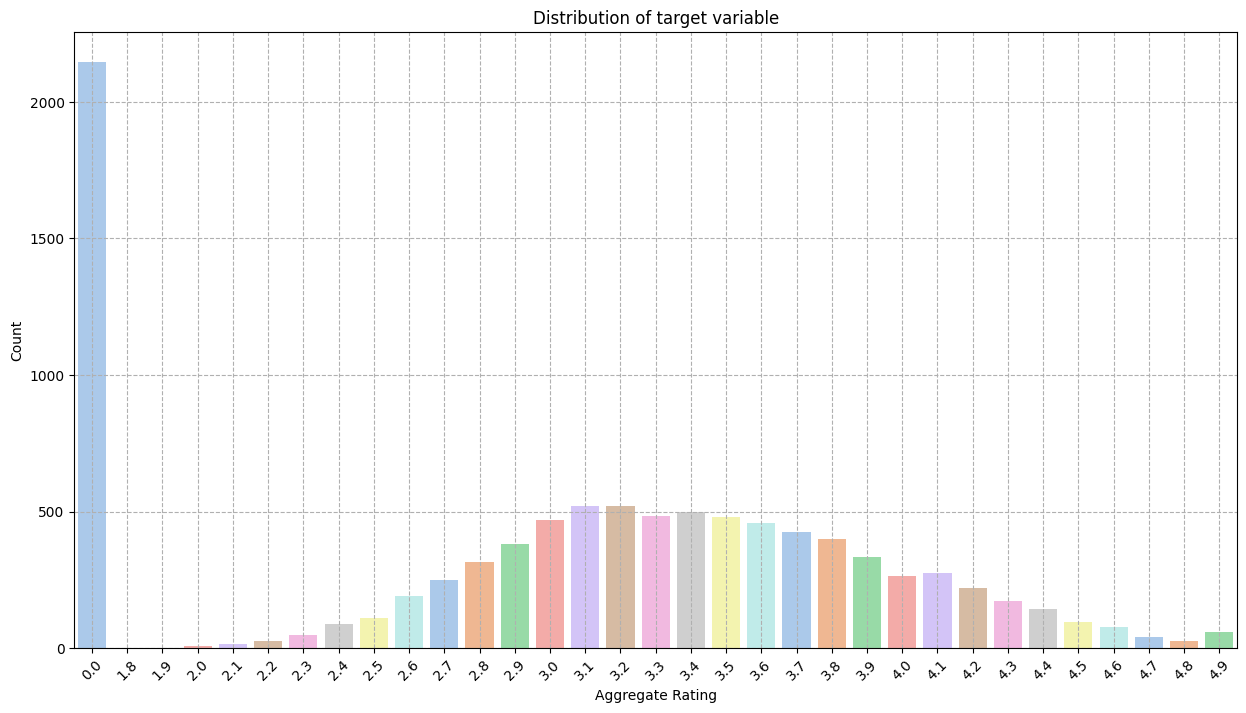

In [ ]:
# Get percentage distribution
class_percentages = df['Aggregate rating'].value_counts(normalize=True) * 50
print("\nClass percentages:\n", class_percentages)
#The distribution of 'Aggregate rating'
plt.figure(figsize=(15, 8))
sns.countplot(x='Aggregate rating', data=df, palette='pastel')
plt.title('Distribution of target variable')
plt.xlabel('Aggregate Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=1)
plt.show()

LEVEL 1 TASK 2

In [ ]:
#Uploading the dataset
from google.colab import files
#Choose a file from your system
uploaded = files.upload()

Saving Dataset .csv to Dataset  (5).csv


In [ ]:
import io
# filename from the uploaded dictionary
df = pd.read_csv(io.BytesIO(uploaded['Dataset  (5).csv']))
# Some Descriptive Statistics
print("Descriptive Statistics (Mean, Std, Min, Max):\n")
print(df.describe())
# Median columns
print("\n Median Values:\n")
print(df.median(numeric_only=True))
# Mode columns
print("\n Mode Values:\n")
print(df.mode(numeric_only=True).iloc[0])  # First mode row if multiple exist
# Standard Deviation
print("\n Standard Deviation:\n")
print(df.std(numeric_only=True))


Descriptive Statistics (Mean, Std, Min, Max):

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
2

In [ ]:
# Cities with Highest Number of Restaurants
print("\n Top 15 Cities with Highest Number of Restaurants:")
top_cities = df['City'].value_counts().head(15)
print(top_cities)
# Top Common Cuisines
print("\n Top 15 Cuisines Offered:")
# Drop missing values and count exact cuisine entries
top_cuisines = df['Cuisines'].value_counts().head(15)
print(top_cuisines)


 Top 15 Cities with Highest Number of Restaurants:
City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
Bhubaneshwar        21
Lucknow             21
Ahmedabad           21
Amritsar            21
Guwahati            21
Rio de Janeiro      20
Bras�_lia           20
Albany              20
Doha                20
Cape Town           20
Name: count, dtype: int64

 Top 15 Cuisines Offered:
Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Pizza, Fast Food                  131
Chinese, Fast Food                118
Mithai, Street Food               116
South Indian                      112
Bake

LEVEL 1 TASK 3

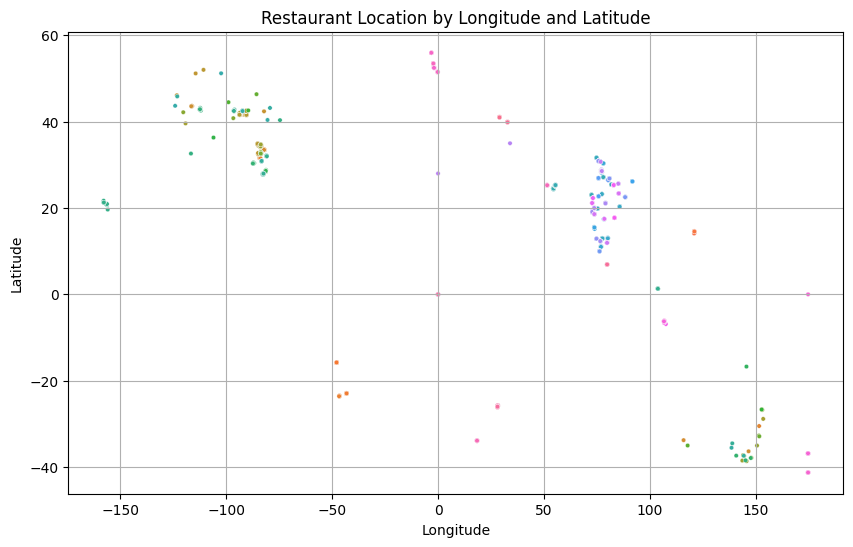

In [ ]:
# Rows with missing coordinate
df = df.dropna(subset=['Latitude', 'Longitude'])
# Scatter plot of restaurant location
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='City', legend=False, s=10)
plt.title("Restaurant Location by Longitude and Latitude")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)
plt.show()

In [ ]:
!pip install folium
import folium
# A base map  around India
map_center = [20.5937, 78.9629]
m = folium.Map(location=map_center, zoom_start=5)
# Add restaurant locations
for idx, row in df.iterrows():
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=1,
        color='green',
        fill=True,
        fill_opacity=0.5
    ).add_to(m)
m


LEVEL 2 TASK 1

Percentage of table booking: 12.12%
Percentage of online delivery: 25.66%

Average rating (with table booking): 3.44
Average rating (without table booking): 2.56


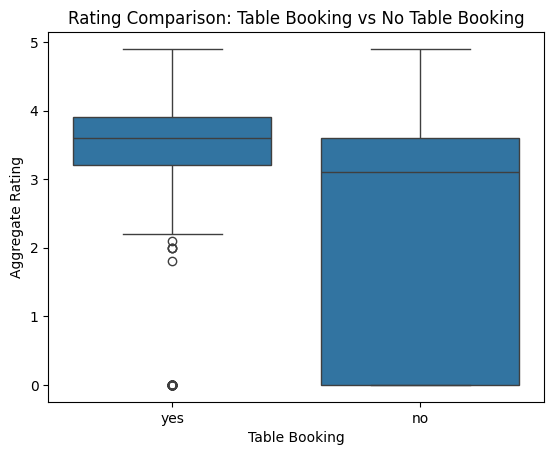


Online delivery percentage by price range:
has online delivery         no        yes
price range                              
1                    84.225923  15.774077
2                    58.689367  41.310633
3                    70.809659  29.190341
4                    90.955631   9.044369


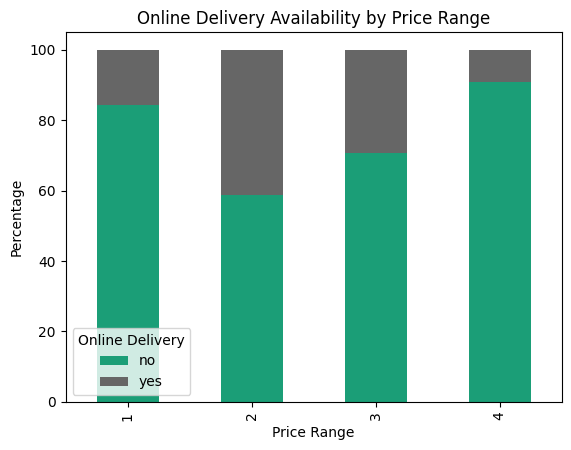

In [ ]:
# Define expected columns
expected_columns = ['has table booking', 'has online delivery', 'aggregate rating', 'price range']
for col in expected_columns:
    if col not in df.columns:
        raise ValueError(f"Missing expected column: {col}")
# Clean and normalize string columns
df['has table booking'] = df['has table booking'].astype(str).str.strip().str.lower()
df['has online delivery'] = df['has online delivery'].astype(str).str.strip().str.lower()
# Calculate percentages
total_restaurants = len(df)
# Use  column names here
table_booking_pct = (df['has table booking'] == 'yes').sum() / total_restaurants * 100
online_delivery_pct = (df['has online delivery'] == 'yes').sum() / total_restaurants * 100
print(f"Percentage of table booking: {table_booking_pct:.2f}%")
print(f"Percentage of online delivery: {online_delivery_pct:.2f}%")

# Compare avg rating for table booking
rating_table_booking = df[df['has table booking'] == 'yes']['aggregate rating'].mean()
rating_no_table_booking = df[df['has table booking'] == 'no']['aggregate rating'].mean()
print(f"\nAverage rating (with table booking): {rating_table_booking:.2f}")
print(f"Average rating (without table booking): {rating_no_table_booking:.2f}")

# Visualize rating comparison
sns.boxplot(data=df, x='has table booking', y='aggregate rating')
plt.title("Rating Comparison: Table Booking vs No Table Booking")
plt.xlabel("Table Booking")
plt.ylabel("Aggregate Rating")
plt.show()

# Online delivery by price range
delivery_by_price = ( df.groupby('price range')['has online delivery']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

print("\nOnline delivery percentage by price range:")
print(delivery_by_price)

# Visualize delivery by price range
delivery_by_price.plot(kind='bar', stacked=True, colormap='Dark2')
plt.title("Online Delivery Availability by Price Range")
plt.ylabel("Percentage")
plt.xlabel("Price Range")
plt.legend(title="Online Delivery")
plt.show()

LEVEL2 TASK 2

In [ ]:
#Most coman price range
most_common_price_range = df['price range'].mode()[0]
print(f"Most common price range: {most_common_price_range}")

# Avg rating by price range
avg_rating_by_price = df.groupby('price range')['aggregate rating'].mean().sort_values(ascending=False)
print("\nAverage rating by price range:")
print(avg_rating_by_price)

# Define color for each price range
colors = {
    1: 'Blue',
    2: 'Green',
    3: 'Gold',
    4: 'Black'
}
# Calculate avg rating by price range
avg_rating_by_price = df.groupby('price range')['aggregate rating'].mean()

# Identify price range with highest average rating
highest_rating_range = avg_rating_by_price.idxmax()

# Get the color for that price range
highest_rating_color = colors.get(highest_rating_range, 'red')
print(f"Color representing the highest average rating: {highest_rating_color}")

Most common price range: 1

Average rating by price range:
price range
4    3.817918
3    3.683381
2    2.941054
1    1.999887
Name: aggregate rating, dtype: float64
Color representing the highest average rating: Black


LEVEL-2 TASK 3

In [ ]:
# Length of restaurant name
df['name length'] = df['restaurant name'].astype(str).str.len()

# Length of address
df['address length'] = df['address'].astype(str).str.len()

#  Has table booking (1 if 'yes', else 0)
df['has table booking'] = df['has table booking'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

#  Has online delivery (1 if 'yes', else 0)
df['has online delivery'] = df['has online delivery'].astype(str).str.strip().str.lower().map({'yes': 1, 'no': 0})

#  Number of cuisines
df['cuisine count'] = df['cuisines'].astype(str).apply(lambda x: len(x.split(',')) if pd.notnull(x) else 0)

#  High rating flag (1 if rating >= 4.0, else 0)
df['aggregate rating'] = pd.to_numeric(df['aggregate rating'], errors='coerce')
df['is high rated'] = df['aggregate rating'].apply(lambda x: 1 if x >= 4.0 else 0)

# Preview the new features
df[['restaurant name', 'name length', 'address length',
    'has table booking', 'has online delivery',
    'cuisine count', 'is high rated']].head()


restaurant name  name length  address length  has table booking  \
0        Le Petit Souffle           16              71                NaN   
1        Izakaya Kikufuji           16              67                NaN   
2  Heat - Edsa Shangri-La           22              56                NaN   
3                    Ooma            4              70                NaN   
4             Sambo Kojin           11              64                NaN   

   has online delivery  cuisine count  is high rated  
0                  NaN              3              1  
1                  NaN              1              1  
2                  NaN              4              1  
3                  NaN              2              1  
4                  NaN              2              1

LEVEL-3 TASK 1

In [2]:
from google.colab import files
uploaded = files.upload()

# Get the actual filename from the uploaded dictionary
# The uploaded dictionary keys are the filenames
file_name = next(iter(uploaded)) # This gets the first (and likely only) filename


Saving Dataset .csv to Dataset  (1).csv


In [6]:
# Ensure pandas is imported before using pd
import pandas as pd
import io
# Read the CSV file using the correct filename
df = pd.read_csv(io.BytesIO(uploaded[file_name]))
df = pd.read_csv("Dataset  (1).csv")


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [8]:
X = df.drop(columns=['Aggregate rating'])
y = df['Aggregate rating']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [10]:
# Define features (X) and target (y)
# Print columns to diagnose the issue
print("Columns in DataFrame:", df.columns.tolist())

# Check if columns exist before dropping
columns_to_drop = ['Aggregate rating', 'City', 'Restaurant Name', 'Address', 'Cuisines']
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# the columns that exist in the DataFrame
X = df.drop(columns=existing_columns_to_drop)

y = df['Aggregate rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Now, X_train should contain only numerical columns (or columns you've already encoded).

# Import the necessary evaluation metrics and regressors
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer here

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42)
}
import numpy as np

# Train and evaluate each model
for name, model in models.items():


    # Check for non-numeric columns in X_train and X_test before fitting
    non_numeric_cols_train = X_train.select_dtypes(exclude=np.number).columns.tolist()
    non_numeric_cols_test = X_test.select_dtypes(exclude=np.number).columns.tolist()

    if non_numeric_cols_train:
        print(f"Warning: X_train contains non-numeric columns: {non_numeric_cols_train}. Consider encoding or dropping them.")
    if non_numeric_cols_test:
         print(f"Warning: X_test contains non-numeric columns: {non_numeric_cols_test}. Consider encoding or dropping them.")
    X_train_numeric = X_train.apply(pd.to_numeric, errors='coerce')
    X_test_numeric = X_test.apply(pd.to_numeric, errors='coerce')

    # columns that couldn't be converted to numeric
    X_train_numeric = X_train_numeric.dropna(axis=1, how='all')
    X_test_numeric = X_test_numeric.dropna(axis=1, how='all')

    # columns match between train and test after dropping
    common_cols = list(set(X_train_numeric.columns) & set(X_test_numeric.columns))
    X_train_numeric = X_train_numeric[common_cols]
    X_test_numeric = X_test_numeric[common_cols]

    # Handle remaining NaN values
    imputer = SimpleImputer(strategy='mean')
    X_train_imputed = imputer.fit_transform(X_train_numeric)
    X_test_imputed = imputer.transform(X_test_numeric)

    #Model fitting
    model.fit(X_train_imputed, y_train)
    preds = model.predict(X_test_imputed) # Use imputed test set
    print(f"\n{name}")
    print("MAE:", mean_absolute_error(y_test, preds))
    print("MSE:", mean_squared_error(y_test, preds))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, preds)))
    print("R2 Score:", r2_score(y_test, preds))

Columns in DataFrame: ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']

Linear Regression
MAE: 1.0352347515130151
MSE: 1.575903806429841
RMSE: 1.2553500732583884
R2 Score: 0.30763253730852114

Decision Tree
MAE: 0.2509157509157509
MSE: 0.15075353218210363
RMSE: 0.3882699218096911
R2 Score: 0.933766997615696

Random Forest
MAE: 0.1830026164311879
MSE: 0.07578453793825222
RMSE: 0.27528991615795195
R2 Score: 0.9667043457668748


LEVEL=3 task 2


In [11]:
# only the relevant columns
df = df[['Cuisines', 'Aggregate rating', 'Votes']].dropna()

# Converting Votes to numeric
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Votes'])

# Group by cuisine to get insights
cuisine_analysis = df.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Cuisines': 'count'
}).rename(columns={
    'Aggregate rating': 'Average Rating',
    'Votes': 'Total Votes',
    'Cuisines': 'Restaurant Count'
})

#Finding most popular cuisines
popular_cuisines = cuisine_analysis.sort_values(by='Total Votes', ascending=False).head(10)

#Finding highest-rated cuisines
top_rated_cuisines = cuisine_analysis.sort_values(by='Average Rating', ascending=False).head(10)

# Show results
print(" Most Popular Cuisines (by Votes):")
print(popular_cuisines)

print("\n Top Rated Cuisines (by Average Rating):")
print(top_rated_cuisines)


 Most Popular Cuisines (by Votes):
                                Average Rating  Total Votes  Restaurant Count
Cuisines                                                                     
North Indian, Mughlai                 2.888623        53747               334
North Indian                          1.672329        46241               936
North Indian, Chinese                 2.421722        42012               511
Cafe                                  2.890970        30657               299
Chinese                               2.042090        21925               354
North Indian, Mughlai, Chinese        2.568528        20115               197
Fast Food                             2.118362        17852               354
South Indian                          2.370536        16433               112
Mughlai, North Indian                 2.091667        15275                60
Italian                               3.657407        14799                54

 Top Rated Cuisines (by Aver

Bar chart visualizations using Matplotlib and Seaborn for:

Most popular cuisines by total votes
Highest-rated cuisines by average rating


<ipython-input-12-3d536b269176>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_voted, x=top_voted.index, y='Total Votes', palette="crest")
<ipython-input-12-3d536b269176>:32: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127869 (\N{FORK AND KNIFE WITH PLATE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


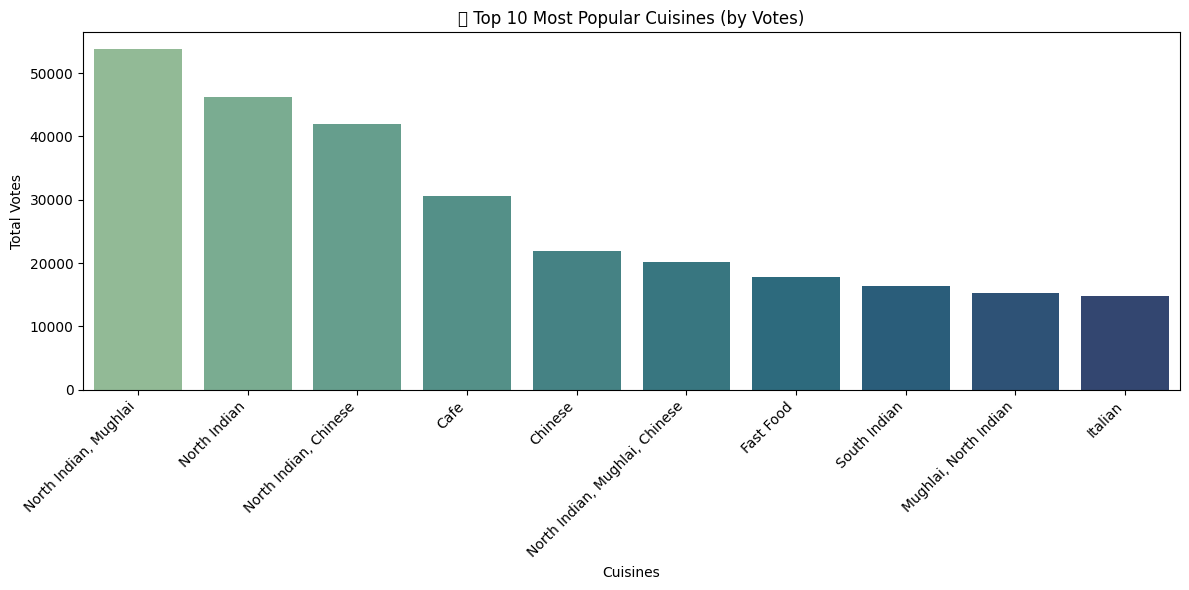

<ipython-input-12-3d536b269176>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_rated, x=top_rated.index, y='Average Rating', palette="flare")
<ipython-input-12-3d536b269176>:42: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


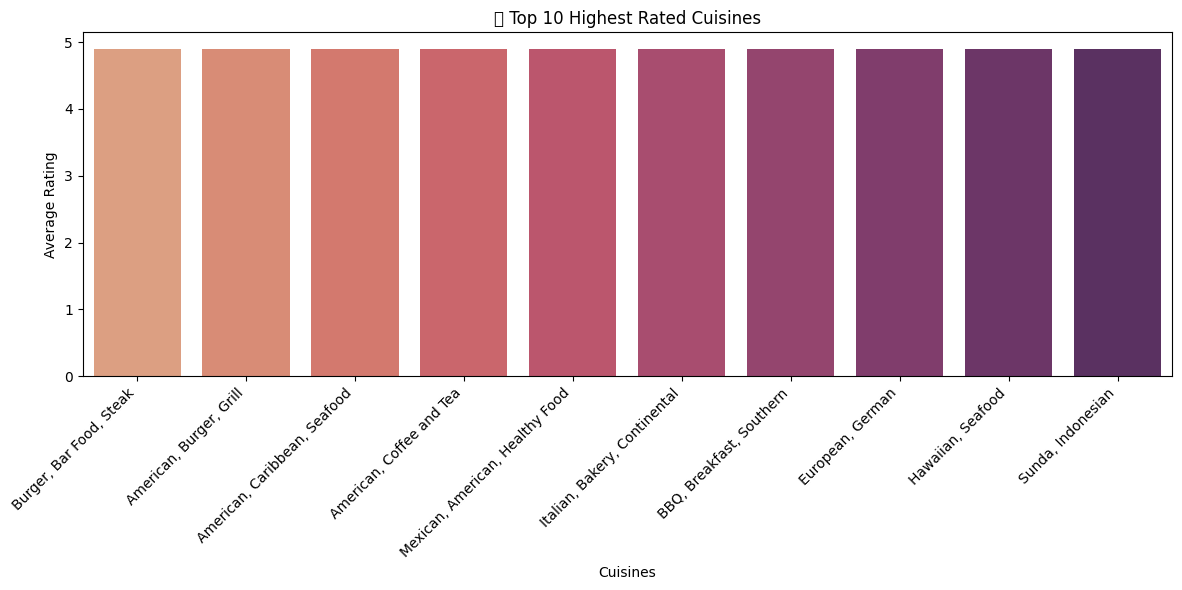

In [12]:
#Selecting relevant columns and clean data
df = df[['Cuisines', 'Aggregate rating', 'Votes']].dropna()
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df = df.dropna(subset=['Votes'])

# Group by Cuisines
cuisine_stats = df.groupby('Cuisines').agg({
    'Aggregate rating': 'mean',
    'Votes': 'sum',
    'Cuisines': 'count'
}).rename(columns={
    'Aggregate rating': 'Average Rating',
    'Votes': 'Total Votes',
    'Cuisines': 'Restaurant Count'
})

# Top cuisines by votes and ratings
top_voted = cuisine_stats.sort_values(by='Total Votes', ascending=False).head(10)
top_rated = cuisine_stats.sort_values(by='Average Rating', ascending=False).head(10)

# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Most Popular Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(data=top_voted, x=top_voted.index, y='Total Votes', palette="crest")
plt.title('🍽️ Top 10 Most Popular Cuisines (by Votes)')
plt.xlabel('Cuisines')
plt.ylabel('Total Votes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot Highest Rated Cuisines
plt.figure(figsize=(12, 6))
sns.barplot(data=top_rated, x=top_rated.index, y='Average Rating', palette="flare")
plt.title('⭐ Top 10 Highest Rated Cuisines')
plt.xlabel('Cuisines')
plt.ylabel('Average Rating')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

LEVEL=3 task 3


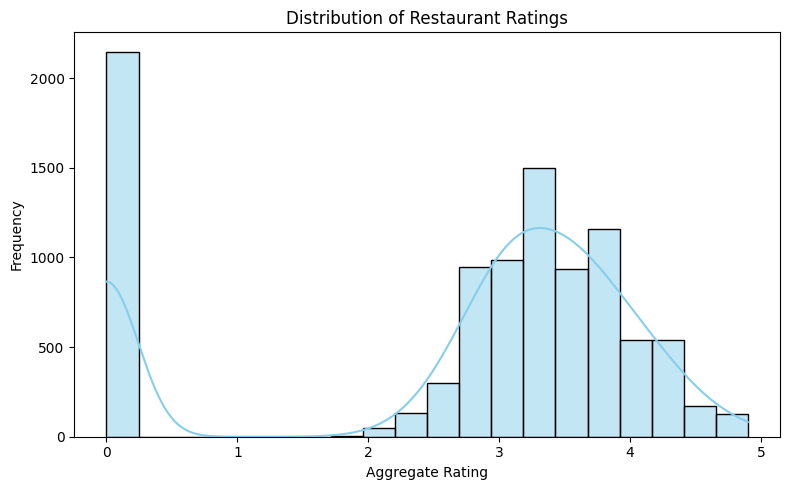

In [ ]:
#Distribution of Ratings
plt.figure(figsize=(8, 5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='skyblue')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Aggregate Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


<ipython-input-57-b67b77ab4648>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='mako')


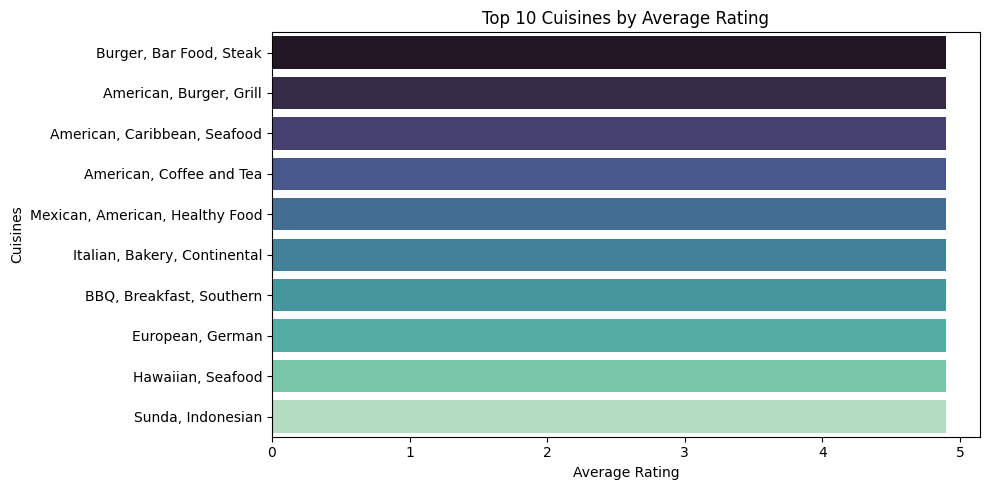

In [ ]:
# Average Rating by Cuisine
top_cuisines = df.groupby('Cuisines')['Aggregate rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=top_cuisines.values, y=top_cuisines.index, palette='mako')
plt.title("Top 10 Cuisines by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Cuisines")
plt.tight_layout()
plt.show()


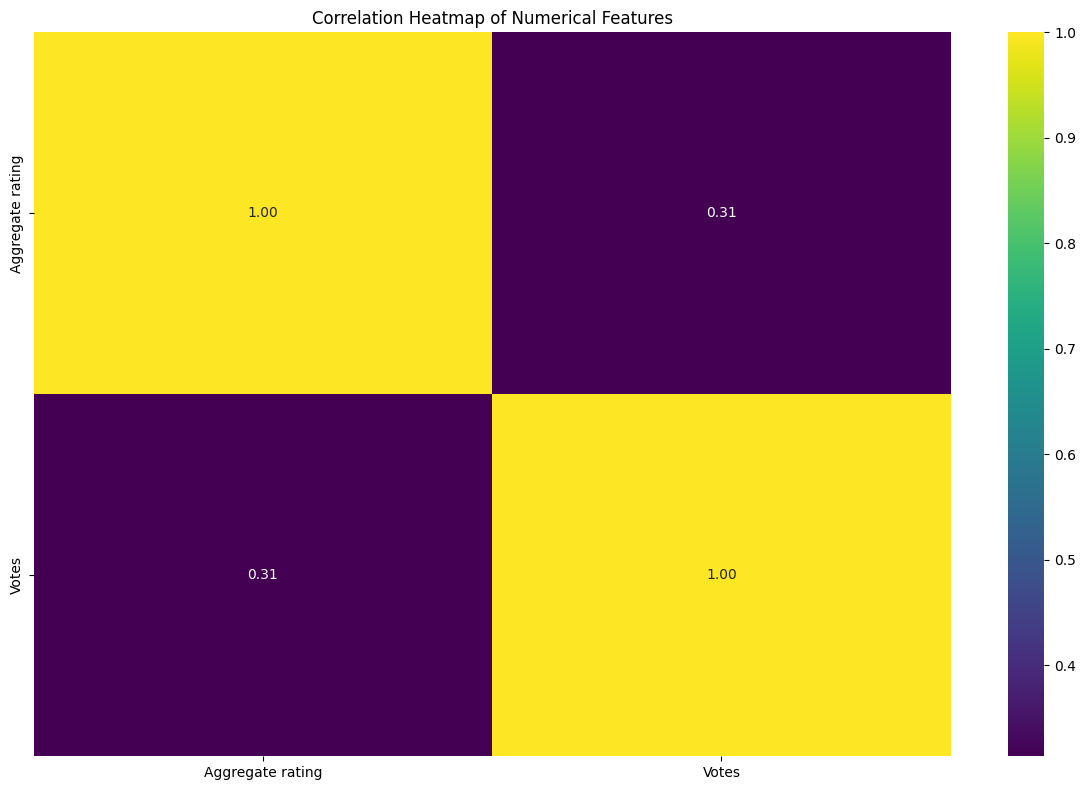

In [13]:
# Visualize the relationship between variousfeatures and the target variable to gain insights
import matplotlib.pyplot as plt
import numpy as np
# Correlation Heatmap
plt.figure(figsize=(12, 8))
# Selecting the numerical columns before calculating correlation
df_numeric = df.select_dtypes(include=np.number)
sns.heatmap(df_numeric.corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()



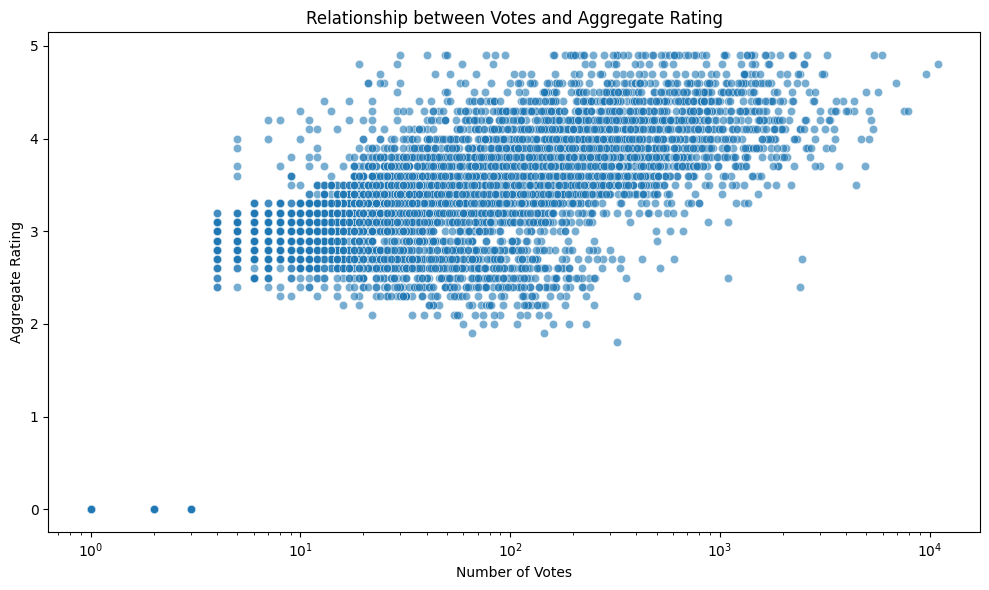

In [14]:
# Scatter plot of Votes vs Aggregate Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Votes', y='Aggregate rating', alpha=0.6)
plt.title("Relationship between Votes and Aggregate Rating")
plt.xlabel("Number of Votes")
plt.ylabel("Aggregate Rating")
plt.xscale('log')
plt.tight_layout()
plt.show()

THANK YOU......
